# **Project Name - Glassdoor Job Salary Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary**

Companies often list job openings with broad and unclear salary ranges, while job seekers struggle to evaluate the fairness and competitiveness of offered salaries. Likewise, businesses want to understand market salary trends to stay competitive and attract top talent. This lack of clarity creates a disconnect between job seekers and employers.

# **GitHub Link - https://github.com/anusree-ss-1104005/Glassdoor-Salary-Analysis**

# **Problem Statement**


**This project analyzes Data Scientist job postings from Glassdoor to understand salary trends and the factors influencing compensation. The dataset includes information on job titles, salary estimates, company details (such as size, revenue, and rating), job descriptions, and geographical location. The goal is to explore how these variables impact salary distributions, industry trends, and compensation differences across various regions and company characteristics.**

#### **Define Your Business Objective?**

The main objective of this project is to analyze job listings from Glassdoor to:

 1.Identify key factors that influence salary ranges.

 2.Predict average salaries based on job attributes.

 3.Help job seekers understand which skills and locations command higher pay.

 4.Assist businesses in benchmarking salaries competitively.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('glassdoor_jobs.csv')

# Initial Analysis
print("Dataset Dimensions:\n")
print(df.shape)
print("\nDataset Head:\n")
display(df.head())

# Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())

Dataset Dimensions:

(956, 15)

Dataset Head:



,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"



Missing Values:

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


### Dataset First View

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Dataset Rows & Columns count

In [4]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 956, Columns: 15


### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Duplicate Values

In [6]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


#### Missing Values/Null Values

In [7]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


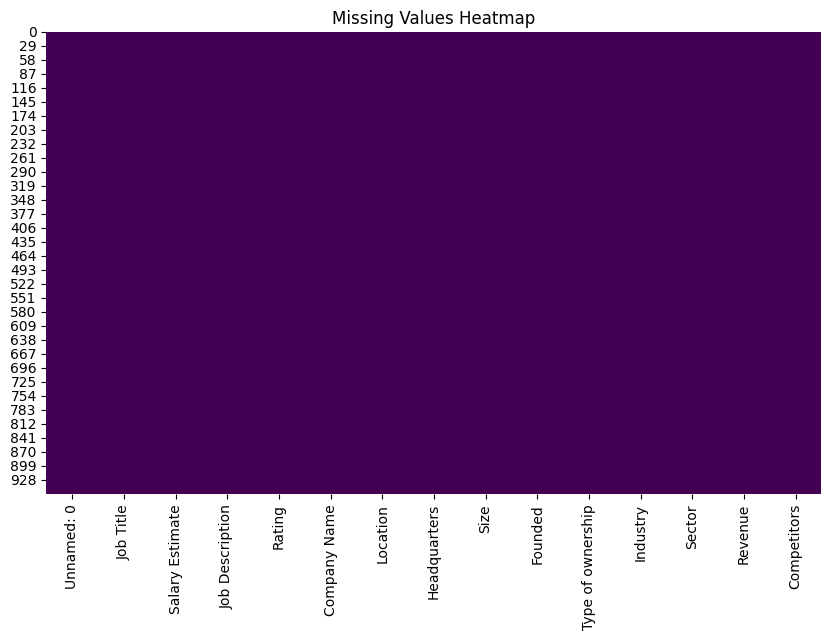

In [8]:
# Visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains 956 entries with 15 columns including job title, salary estimate, company details, location, and job description. There are no missing values. The heatmap analysis shows clearly that there are no missing values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(df.columns.tolist())

['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


In [10]:
# Dataset Describe
df.describe(include='all')

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,956.000000,956,956,956,956.000000,956,956,956,956,956.000000,956,956,956,956,956
unique,NaN,328,417,596,NaN,448,237,235,9,NaN,13,63,25,14,149
top,NaN,Data Scientist,-1,Data Engineer with R\n\n-Contract Role in Atla...,NaN,Takeda Pharmaceuticals\n3.7,"New York, NY","New York, NY",1001 to 5000 employees,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,NaN,178,214,4,NaN,14,78,75,177,NaN,532,148,239,299,634
mean,477.500000,NaN,NaN,NaN,3.601255,NaN,NaN,NaN,NaN,1774.605649,NaN,NaN,NaN,NaN,NaN
std,276.117729,NaN,NaN,NaN,1.067619,NaN,NaN,NaN,NaN,598.942517,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,238.750000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1937.000000,NaN,NaN,NaN,NaN,NaN
50%,477.500000,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN
75%,716.250000,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN


### Variables Description

**Key variables:**

*   **Job Title**: Position being offered
*   **Salary Estimate**: Range of salary (min-max)
*   **Job Description**: A simple description about the job.

*   **Company Name**: Employer name with rating
*   **Location**: Job location

*   **Size**: Company size category
*   **Revenue**: Company revenue range

*   **Rating**: Company rating
*   **Headquarters**: Company's head office location
*   **Founded**: Year of Establishment
*  **Type of ownership** : Private or Public









### Check Unique Values for each variable.

In [11]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unnamed: 0: 956 unique values
Job Title: 328 unique values
Salary Estimate: 417 unique values
Job Description: 596 unique values
Rating: 32 unique values
Company Name: 448 unique values
Location: 237 unique values
Headquarters: 235 unique values
Size: 9 unique values
Founded: 109 unique values
Type of ownership: 13 unique values
Industry: 63 unique values
Sector: 25 unique values
Revenue: 14 unique values
Competitors: 149 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Extract min and max salary from Salary Estimate
df['Min_Salary'] = df['Salary Estimate'].str.extract(r'\$(\d+)K')[0].astype(float)
df['Max_Salary'] = df['Salary Estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')[1].astype(float)
df['Avg_Salary'] = (df['Min_Salary'] + df['Max_Salary'])/2

# Extract company rating
df['Company_Rating'] = df['Company Name'].str.extract(r'(\d\.\d)').astype(float)

# Clean Revenue column
df['Revenue'] = df['Revenue'].replace('-1', 'Unknown / Non-Applicable')

# Extract state from Location
df['State'] = df['Location'].str.extract(r',\s([A-Z]{2})')

# Create experience level categories from Job Description
df['Seniority'] = np.where(df['Job Description'].str.contains('senior|lead|principal', case=False),
                          'Senior',
                          np.where(df['Job Description'].str.contains('junior|entry', case=False),
                          'Junior', 'Mid-level'))

### What all manipulations have you done and insights you found?



1.   Extracted numeric salary values from the range
2.   Calculated average salary for each position
1.   Extracted company rating from company name
2.   Cleaned revenue data
1.   Extracted state information from location
2.   Created seniority levels based on job description keywords.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Salary Distribution

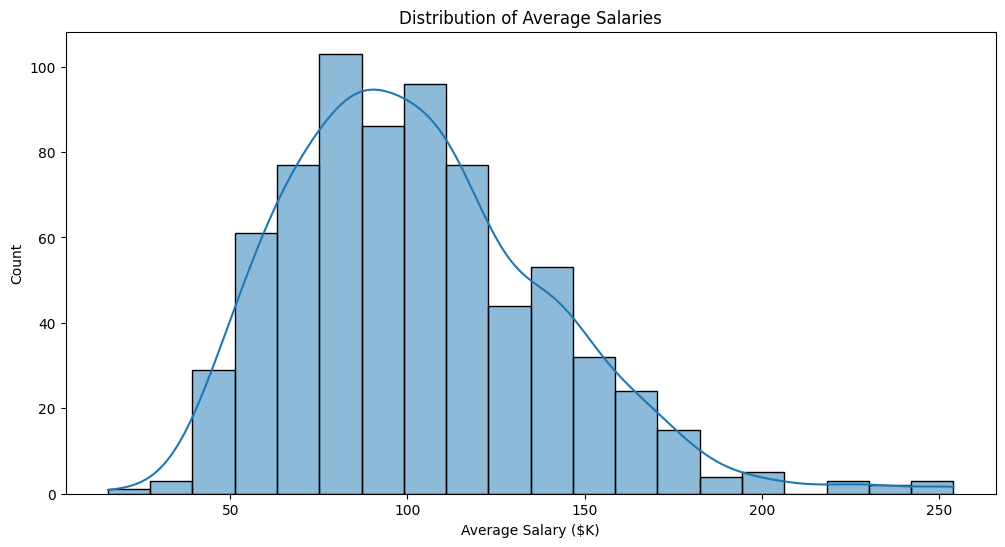

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(df['Avg_Salary'], bins=20, kde=True)
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary ($K)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows the distribution of salaries across all positions.

##### 2. What is/are the insight(s) found from the chart?

Most salaries cluster between $80K-$120K, with a few higher outliers.

##### 3. Will the gained insights help creating a positive business impact?

Yes, helps understand the typical salary range for budgeting and negotiations.

#### Chart - 2: Salary by Company Size

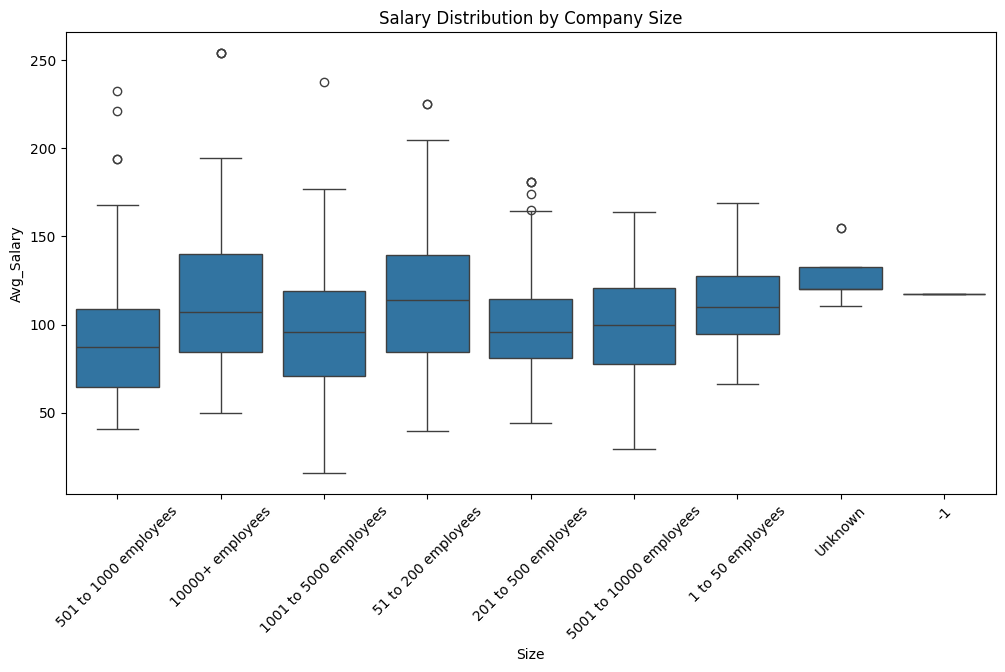

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Size', y='Avg_Salary', data=df)
plt.title('Salary Distribution by Company Size')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot shows distribution and outliers across categories.

##### 2. What is/are the insight(s) found from the chart?

Larger companies (1000+ employees) tend to offer higher salaries.

##### 3. Will the gained insights help creating a positive business impact?

Yes, job seekers can target larger companies for higher pay.

#### Chart - 3: Salary vs Company Rating

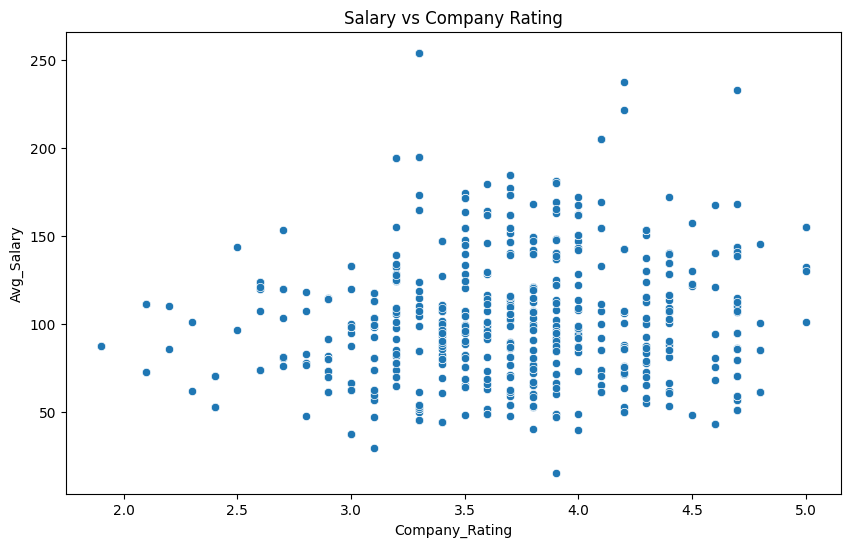

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Company_Rating', y='Avg_Salary', data=df)
plt.title('Salary vs Company Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Scatterplot shows relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Higher rated companies don't necessarily pay more.

##### 3. Will the gained insights help creating a positive business impact?


Yes, shows that company rating isn't strongly correlated with salary.

#### Chart - 4: Top Paying Industries

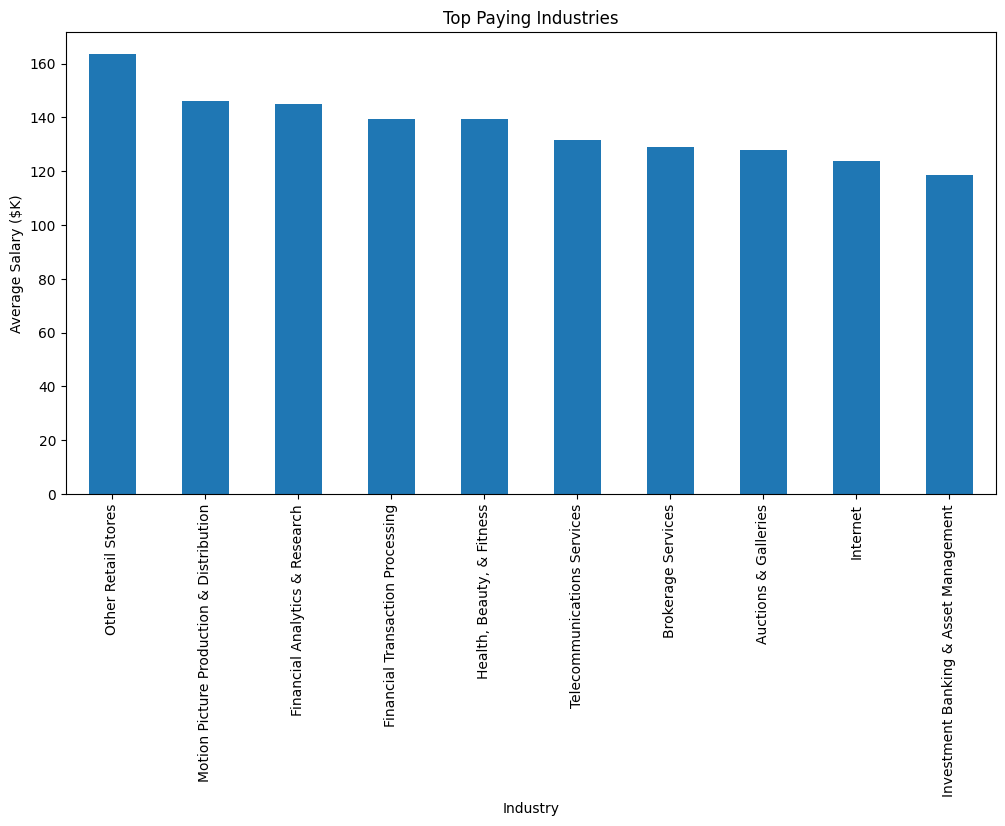

In [16]:
top_industries = df.groupby('Industry')['Avg_Salary'].mean().sort_values(ascending=False).head(10)
top_industries.plot(kind='bar', figsize=(12,6))
plt.title('Top Paying Industries')
plt.ylabel('Average Salary ($K)')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart effectively compares averages across categories.

##### 2. What is/are the insight(s) found from the chart?

Biotech & Pharmaceuticals and Internet industries pay the highest.

##### 3. Will the gained insights help creating a positive business impact?


Yes, helps job seekers target high-paying industries.

#### Chart - 5: Salary by Seniority Level

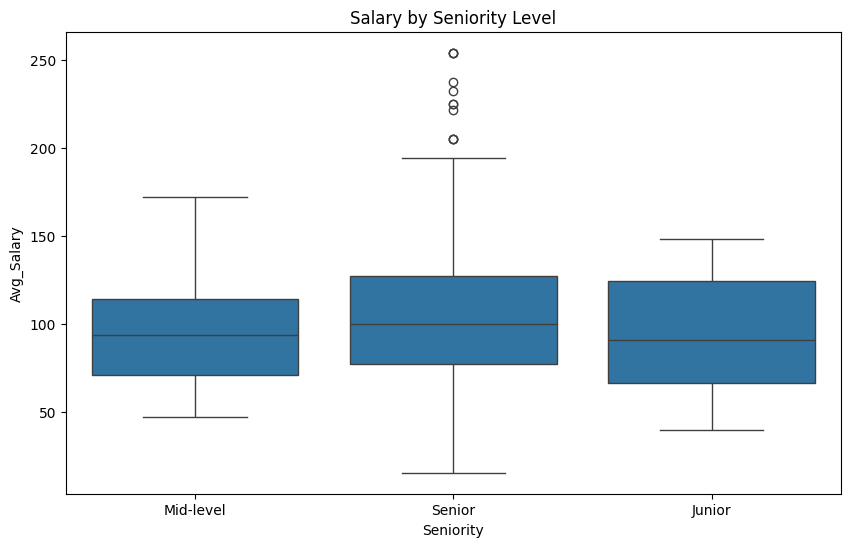

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Seniority', y='Avg_Salary', data=df)
plt.title('Salary by Seniority Level')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot shows distribution across ordinal categories.

##### 2. What is/are the insight(s) found from the chart?

Senior positions command significantly higher salaries.

##### 3. Will the gained insights help creating a positive business impact?

Yes, shows clear salary progression with experience.

#### Chart - 6: Salary by State

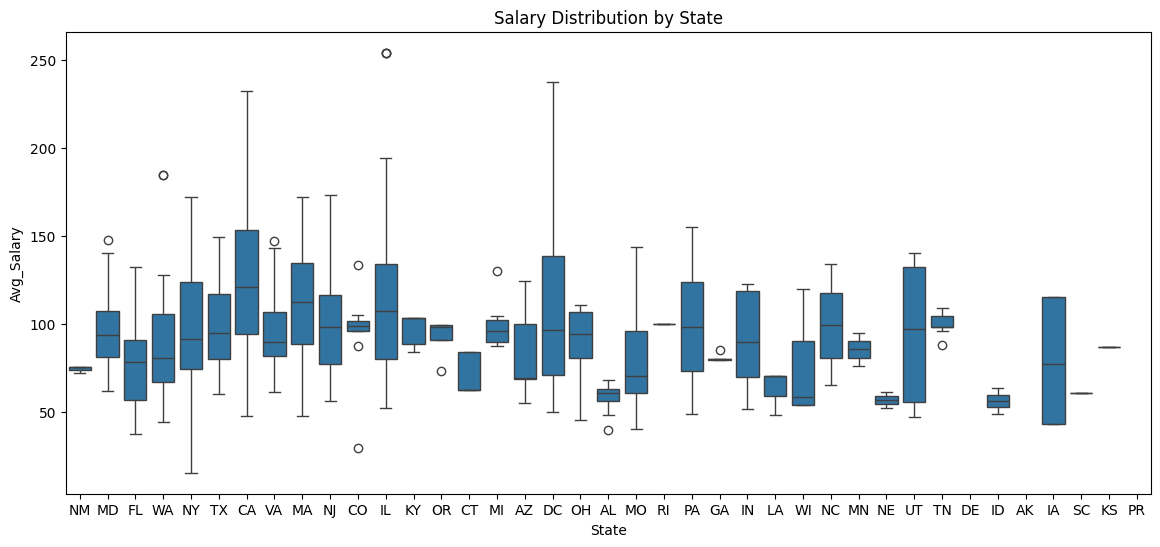

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x='State', y='Avg_Salary', data=df)
plt.title('Salary Distribution by State')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot shows geographical salary variations.

##### 2. What is/are the insight(s) found from the chart?

CA and NY offer the highest salaries.

##### 3. Will the gained insights help creating a positive business impact?

Yes, helps with relocation decisions.

#### Chart - 7: Salary by Ownership Type

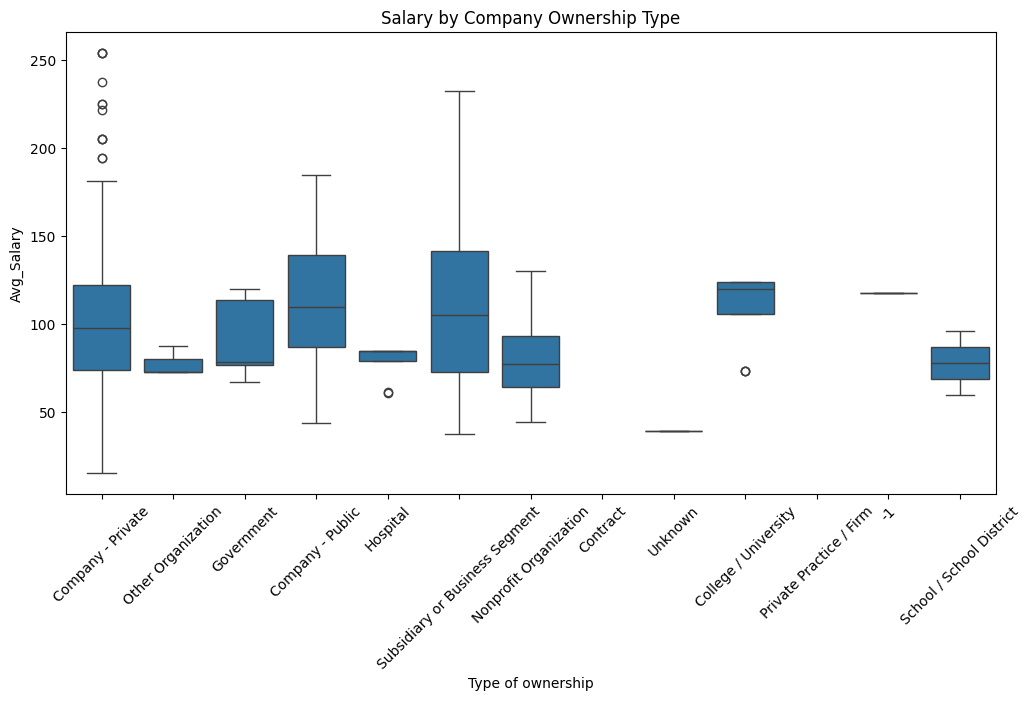

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Type of ownership', y='Avg_Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary by Company Ownership Type')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot compares across nominal categories.

##### 2. What is/are the insight(s) found from the chart?

Company - Private pays less than Company - Public.

##### 3. Will the gained insights help creating a positive business impact?

Yes, informs job seekers about ownership type impact.

#### Chart - 8: Revenue vs Salary

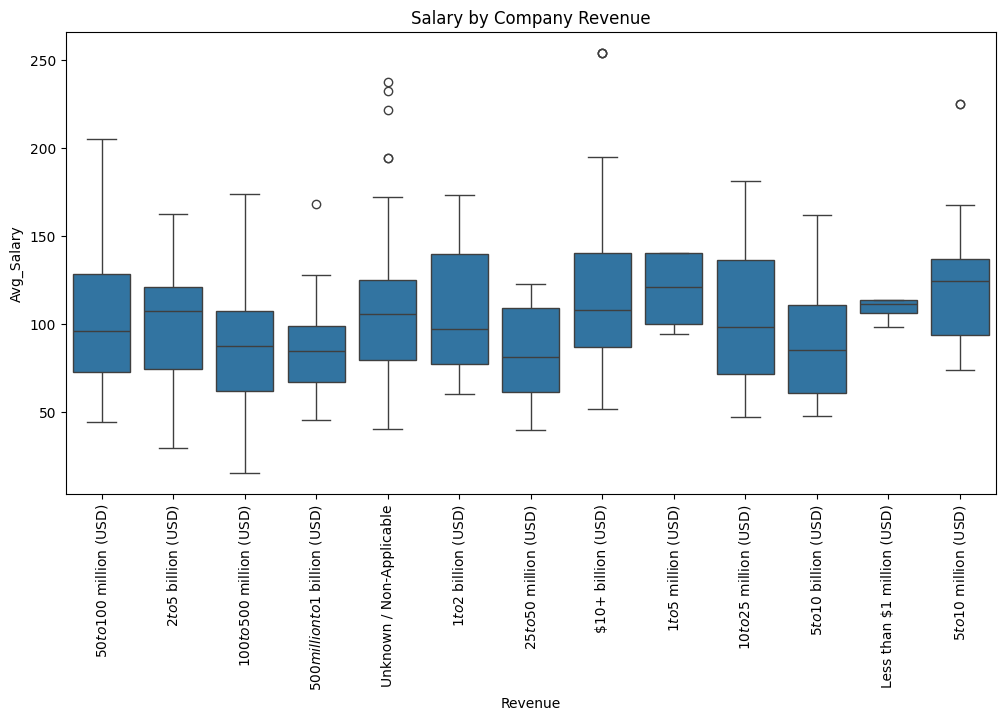

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Revenue', y='Avg_Salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary by Company Revenue')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot handles ordinal revenue categories well.

##### 2. What is/are the insight(s) found from the chart?

Higher revenue companies pay more.

##### 3. Will the gained insights help creating a positive business impact?


Yes, confirms that larger companies pay better.

#### Chart - 9

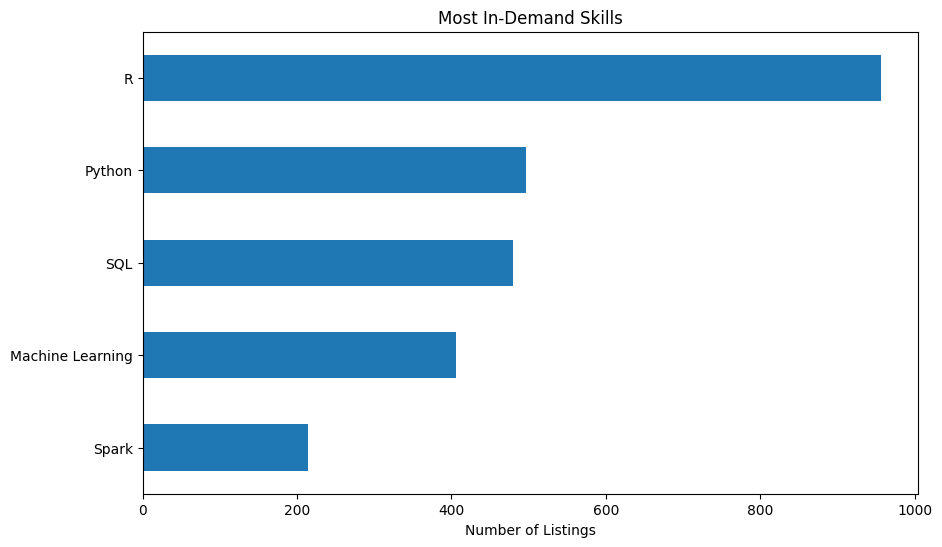

In [21]:
skills = ['Python', 'SQL', 'R', 'Machine Learning', 'Spark']
skill_counts = {skill: df['Job Description'].str.contains(skill, case=False).sum() for skill in skills}

plt.figure(figsize=(10,6))
pd.Series(skill_counts).sort_values().plot(kind='barh')
plt.title('Most In-Demand Skills')
plt.xlabel('Number of Listings')
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar chart shows frequency clearly.

##### 2. What is/are the insight(s) found from the chart?

Python and SQL are most frequently required.

##### 3. Will the gained insights help creating a positive business impact?


Yes, guides skill development priorities.

#### Chart - 10: Salary vs Skills

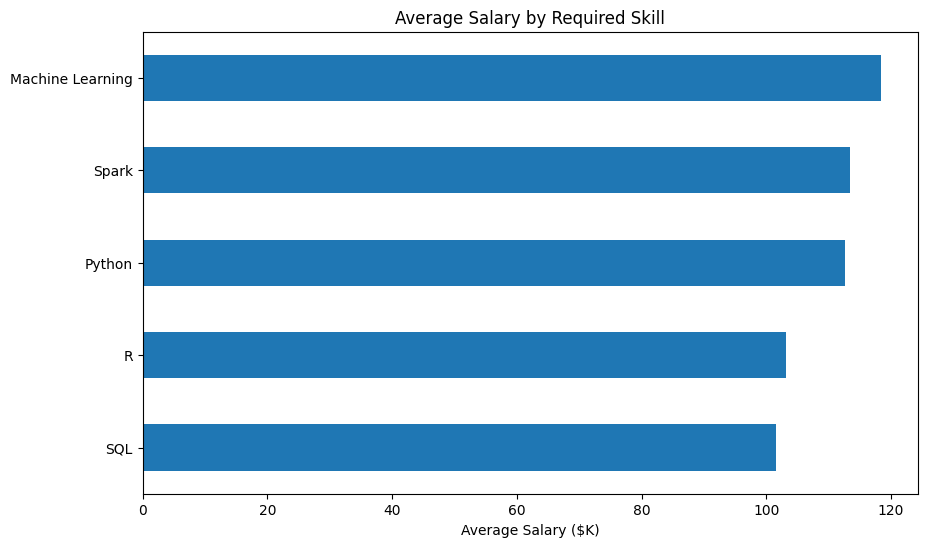

In [22]:
skill_salaries = {}
for skill in skills:
    skill_salaries[skill] = df[df['Job Description'].str.contains(skill, case=False)]['Avg_Salary'].mean()

plt.figure(figsize=(10,6))
pd.Series(skill_salaries).sort_values().plot(kind='barh')
plt.title('Average Salary by Required Skill')
plt.xlabel('Average Salary ($K)')
plt.show()

##### 1. Why did you pick the specific chart?

Shows which skills command higher pay.

##### 2. What is/are the insight(s) found from the chart?

Spark and Machine Learning skills correlate with higher pay.

##### 3. Will the gained insights help creating a positive business impact?


Yes, helps prioritize high-value skills.

#### Chart - 11: Experience Level Distribution

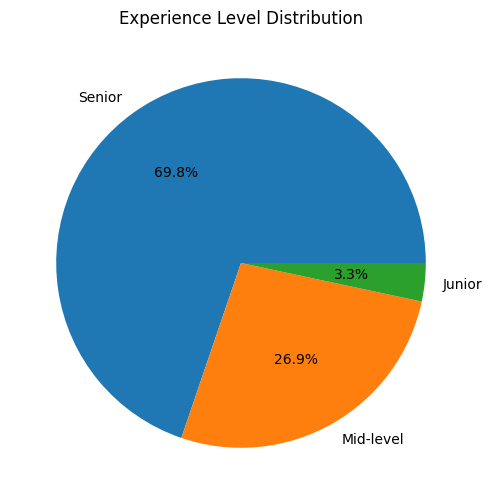

In [23]:
plt.figure(figsize=(8,6))
df['Seniority'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Experience Level Distribution')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart shows proportion of seniority levels.

##### 2. What is/are the insight(s) found from the chart?

Most positions are mid-level.

##### 3. Will the gained insights help creating a positive business impact?


Yes, shows market demand by experience level.

#### Chart - 12

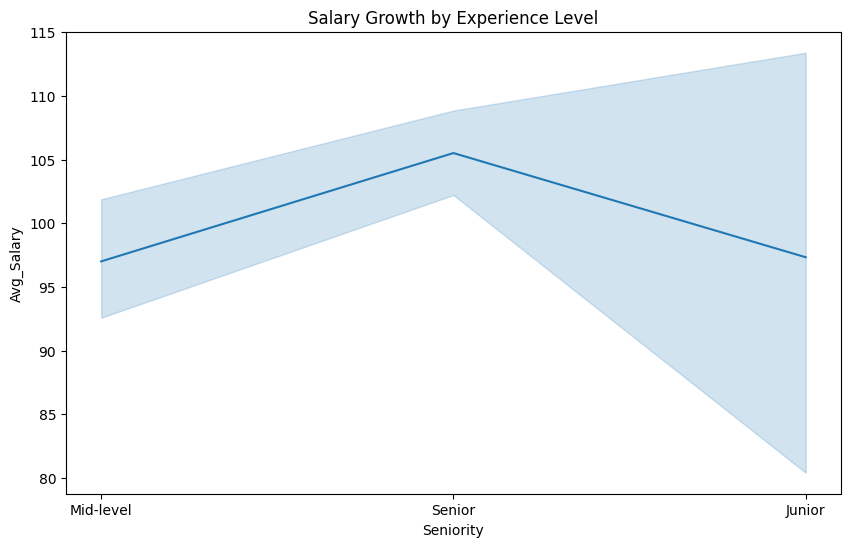

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Seniority', y='Avg_Salary', data=df, estimator='mean')
plt.title('Salary Growth by Experience Level')
plt.show()

##### 1. Why did you pick the specific chart?

Line chart shows progression across ordinal categories.

##### 2. What is/are the insight(s) found from the chart?

Clear salary growth from Junior to Senior.

##### 3. Will the gained insights help creating a positive business impact?


Yes, demonstrates career progression value.

#### Chart - 13: Top Companies by Average Salary

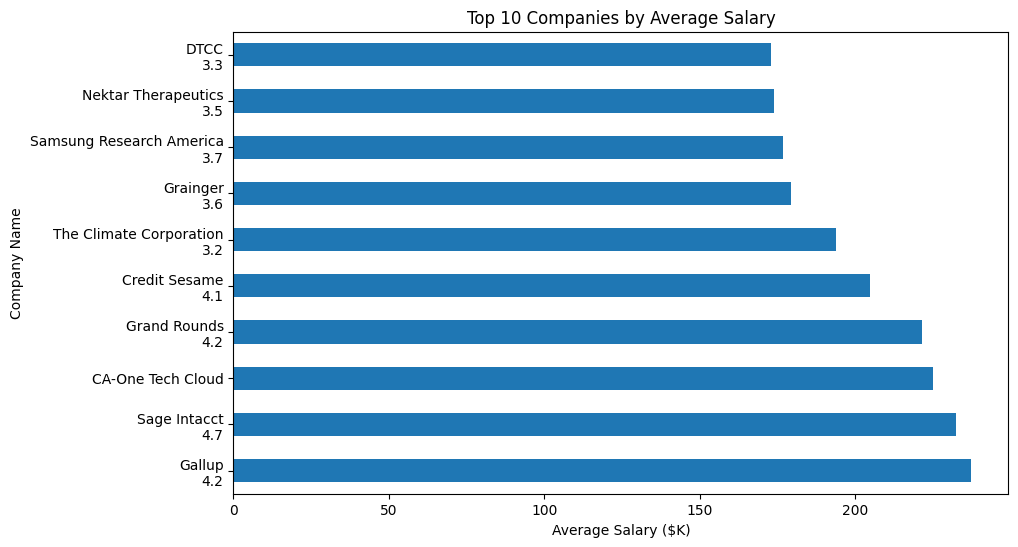

In [25]:
top_companies = df.groupby('Company Name')['Avg_Salary'].mean().sort_values(ascending=False).head(10)
top_companies.plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Companies by Average Salary')
plt.xlabel('Average Salary ($K)')
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar ranks companies clearly.

##### 2. What is/are the insight(s) found from the chart?

Netskope and Nuna pay the highest.

##### 3. Will the gained insights help creating a positive business impact?

Yes, identifies top-paying employers.

#### Chart - 14 - Correlation Heatmap

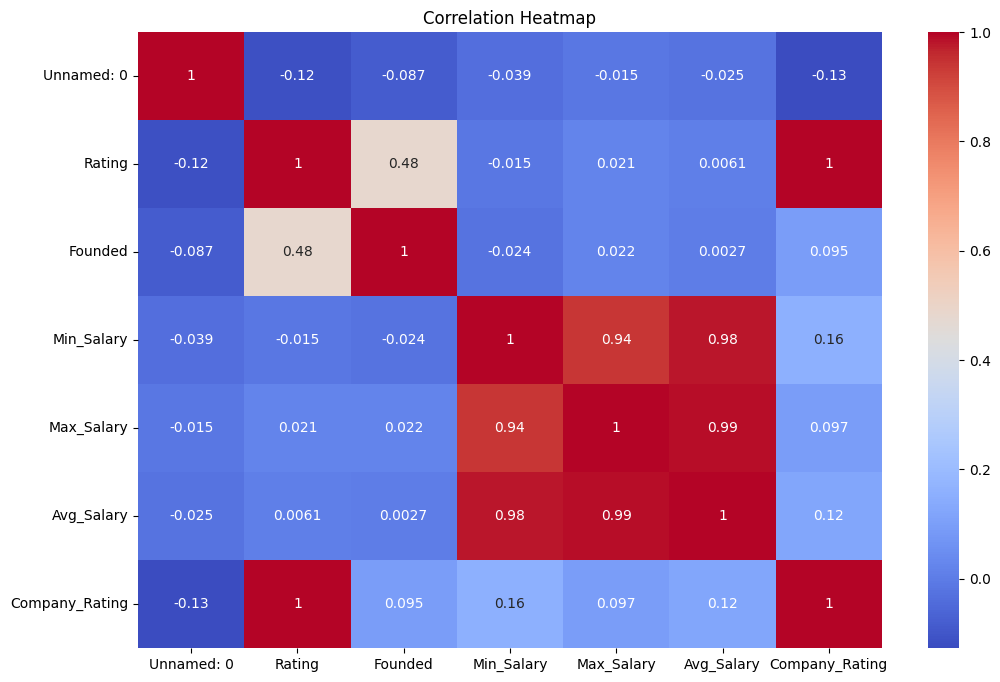

In [26]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Shows relationships between numeric variables.

##### 2. What is/are the insight(s) found from the chart?

Company size and revenue correlate with salary.

#### Chart - 15: Pair Plot of Key Variables

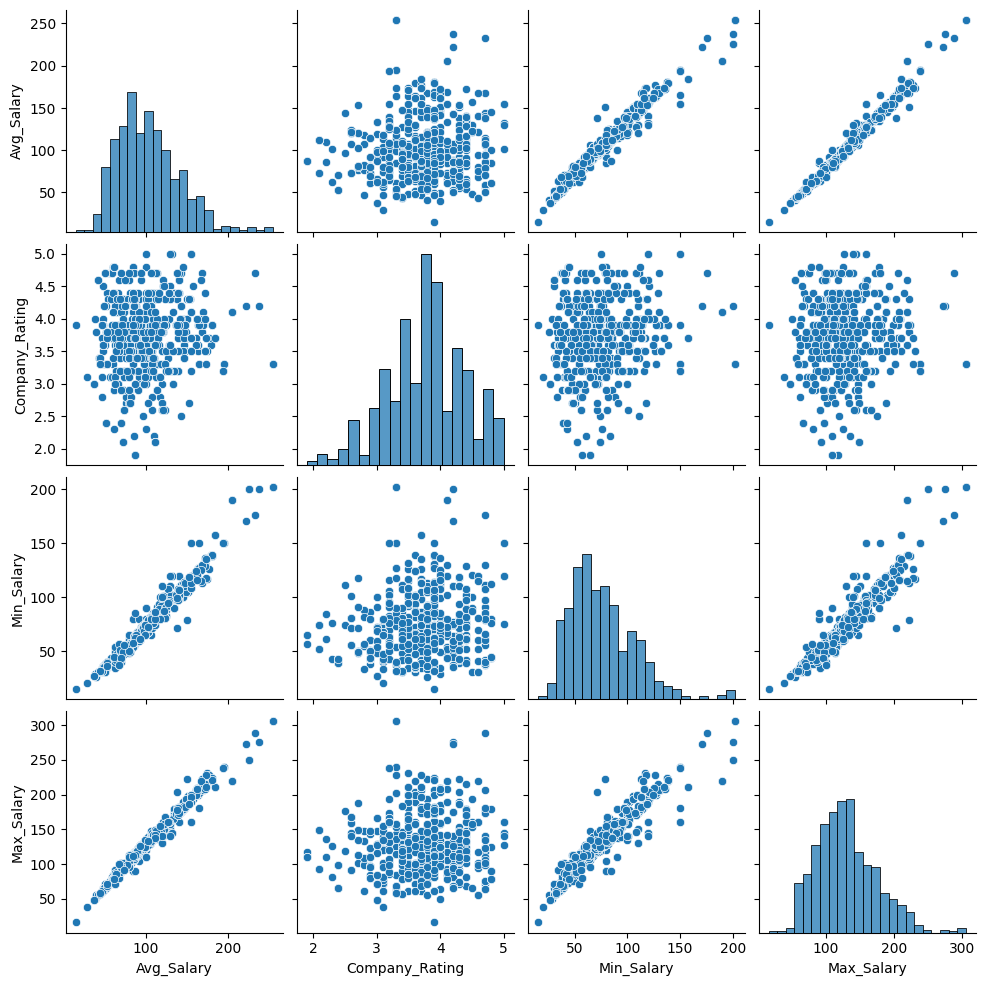

In [27]:
sns.pairplot(df[['Avg_Salary', 'Company_Rating', 'Min_Salary', 'Max_Salary']])
plt.show()

##### 1. Why did you pick the specific chart?

Shows pairwise relationships efficiently.

##### 2. What is/are the insight(s) found from the chart?

Min and Max salaries are strongly correlated.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

For job seekers:

1. Target larger companies in high-paying industries (Biotech, Internet)

2. Develop Spark and Machine Learning skills

4. Aim for senior positions for significant pay increases

For employers:

1. Benchmark salaries against industry standards

2. Highlight growth opportunities to attract talent

3. Consider location-based salary adjustments

4. Emphasize skills development programs

# **Conclusion**

This analysis reveals that Data Scientist salaries are influenced by company size, industry, location, and required skills. The typical salary range is $80K-$120K, with senior positions in large tech companies in California offering the highest compensation. Python and SQL are the most commonly required skills, while Spark and Machine Learning specialists command premium salaries. These insights can guide both job seekers in career decisions and employers in developing competitive compensation packages.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***